Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [3]:
img = imageio.imread('./drive/MyDrive/city.png')
print(img.shape)

(667, 1000, 3)


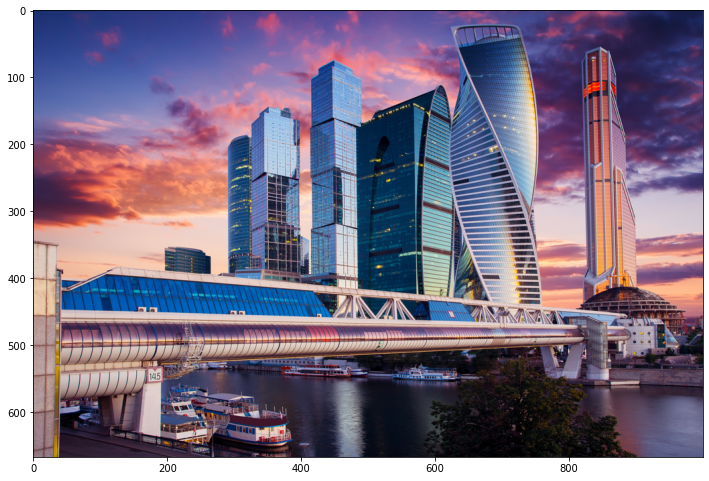

In [4]:
plt.figure(figsize=(12, 12))
plt.imshow(img);

Пороговая фильтрация

In [5]:
img_threshold = img.astype(np.float32) / 255. 

In [6]:
threshold = 0.7
img_bw = np.mean(img_threshold, axis=2)
img_bin = (img_bw > threshold).astype(np.uint8)

In [7]:
img_bin[:5, :5]

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

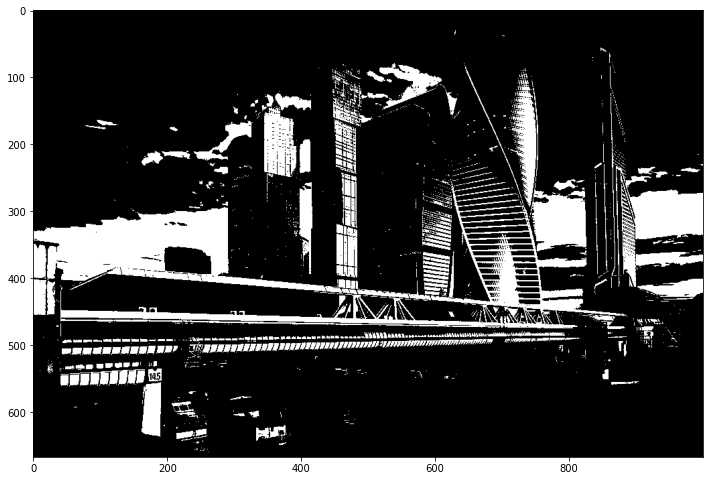

In [8]:
plt.figure(figsize=(12, 12))
plt.imshow(img_bin*255, cmap='gray');

Размытие

In [9]:
win_size = (9, 9) 
out_img = np.zeros(
    (img.shape[0] - win_size[0] + 1,
     img.shape[1] - win_size[1] + 1), 
     dtype=np.float32)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        conv = img[i:i+win_size[0], j:j+win_size[1]]
        out_img[i,j] = np.median(conv)

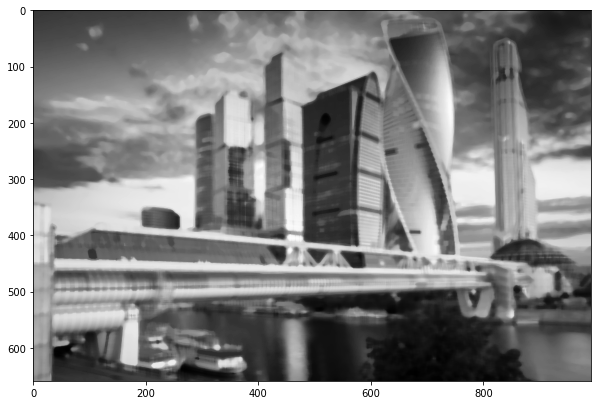

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(out_img, cmap='gray');

Горизонтальные границы

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


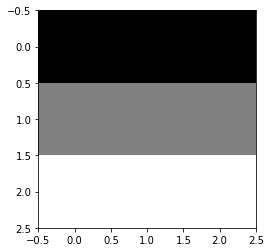

In [11]:
win_size = (3, 3)
w = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

print(w)
plt.imshow(w, cmap='gray');

In [12]:
img_in = img[:,:,0].astype(np.float32) / 255.
print(img.shape)

(667, 1000, 3)


In [13]:
%%time

img_out = np.zeros(
    (img_in.shape[0] - w.shape[0] + 1,
     img_in.shape[1] - w.shape[1] + 1), 
     dtype=np.float32)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img_in[i:i+w.shape[0], j:j+w.shape[1]]

        img_out[i,j] = np.sum(w * x)

CPU times: user 9.44 s, sys: 15.9 ms, total: 9.45 s
Wall time: 9.48 s


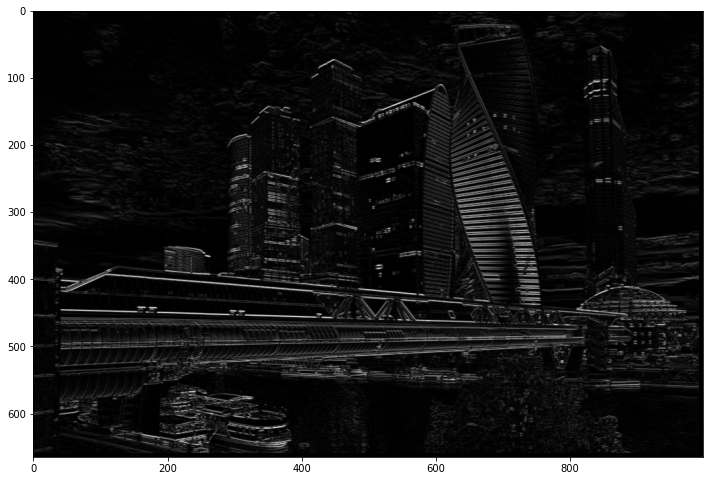

In [14]:
plt.figure(figsize=(12, 12))
plt.imshow(np.abs(img_out), cmap='gray');

Контрастность

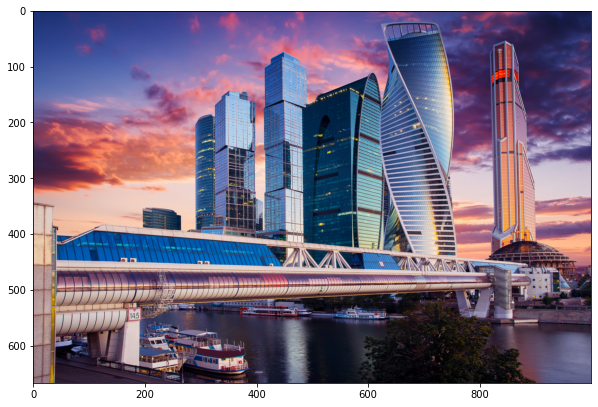

In [22]:
img_32 = img.astype(np.float32) / 255.
plt.figure(figsize=(10, 10))
plt.imshow(img_32);

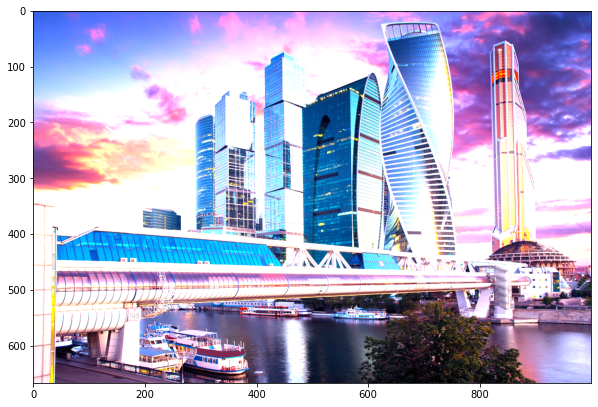

In [19]:
plt.figure(figsize=(10, 10))
plt.imshow(img_32*2);

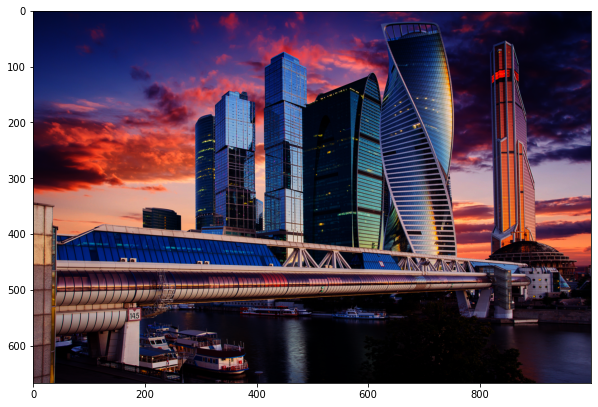

In [20]:
plt.figure(figsize=(10, 10))
plt.imshow(img_32**2);

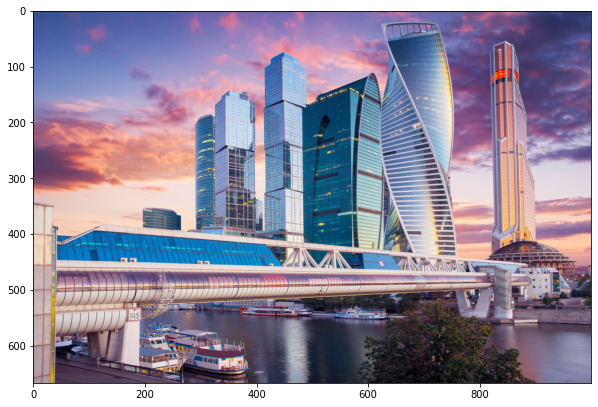

In [21]:
plt.figure(figsize=(10, 10))
plt.imshow(img_32**0.7);